# CSE 5526 PA3 Utkarsh Pratap Singh Jadon

## Question 1

### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

### Load train data and create dataframe object

In [2]:
# Load and store training data in lists

XTrainData =[]
YTrainData =[]
with open('ncRNA_s.train.txt','r') as file:
  for l in file:
    temp_dict = {}
    tmp = l.strip("\n").split(" ")
    YTrainData.append(int(tmp[0]))
    for value in tmp[1:]:
      index, value = value.split(':')
      temp_dict[index] = value
    XTrainData.append(temp_dict)

# Create dataframe object for training data

dfXTrain = pd.DataFrame.from_dict(XTrainData)
dfXTrain.head()

,1,2,3,4,5,6,7,8
0,0.73834,0.0878964,0.812912,0.829121,0.197331,0.263444,0.449439,0.628271
1,0.822021,0.882066,0.289181,0.414854,0.717044,0.283122,0.251447,0.755608
2,0.644661,0.109192,0.797813,0.768969,0.0885151,0.168189,0.329582,0.780204
3,0.833966,0.895573,0.259839,0.276828,0.755717,0.366283,0.353483,0.677109
4,0.826579,0.784457,0.298902,0.37957,0.636372,0.348631,0.359892,0.623756


In [3]:
print(dfXTrain.shape)
dfXTrain.fillna(0,inplace =True)

(2000, 8)


### Load test data and create dataframe object

In [4]:
# Load and store test data in lists

XTestData =[]
YTestData =[]

with open('ncRNA_s.test.txt','r') as file:
  for l in file:
    temp_dict = {}
    tmp = (l.strip("\n").split(" "))
    YTestData.append(int(tmp[0]))
    for value in tmp[1:]:
      index, value = value.split(':')
      temp_dict[index] = value
    XTestData.append(temp_dict)

# Create dataframe object for test data    

dfXTest = pd.DataFrame.from_dict(XTestData)
dfXTest.head()

,1,2,3,4,5,6,7,8
0,0.82344,0.151015,0.371463,0.739179,0.521662,0.181503,0.304412,0.664263
1,0.862775,0.908975,0.4566,0.43232,0.595425,0.225958,0.268704,0.738061
2,0.80697,0.151015,0.117076,0.35063,0.669115,0.375613,0.0874905,0.774586
3,0.8391,0.895573,0.110854,0.724869,0.454829,0.254314,0.302913,0.716048
4,0.834618,0.882066,0.287209,0.282103,0.764761,0.319583,0.381718,0.677109


In [5]:
dfXTest.shape
dfXTest.fillna(0,inplace =True)

### Convert dataframes to numpy arrays

In [6]:
# Training data numpy
Xtr = dfXTrain.to_numpy()
Ytr = np.array(YTrainData)


# Test data numpy
Xts = dfXTest.to_numpy()
Yts = np.array(YTestData)

### Part 1 - Classification using linear SVMs

In [7]:
power_values = np.arange(-4, 9, 1, dtype = 'float')
C_values = [2**i for i in range(-4,9)]
accuracy = []

for C in C_values:
    clf = SVC(kernel = 'linear', C = C)
    clf.fit(Xtr,Ytr)
    predict = clf.score(Xts,Yts)
    accuracy.append(predict)
    print('Test data accuracy for C = {} is : {} '.format(C,predict))

Test data accuracy for C = 0.0625 is : 0.6643356643356644 
Test data accuracy for C = 0.125 is : 0.6643356643356644 
Test data accuracy for C = 0.25 is : 0.6643356643356644 
Test data accuracy for C = 0.5 is : 0.7782217782217782 
Test data accuracy for C = 1 is : 0.9250749250749251 
Test data accuracy for C = 2 is : 0.9400599400599401 
Test data accuracy for C = 4 is : 0.9370629370629371 
Test data accuracy for C = 8 is : 0.9370629370629371 
Test data accuracy for C = 16 is : 0.938061938061938 
Test data accuracy for C = 32 is : 0.938061938061938 
Test data accuracy for C = 64 is : 0.938061938061938 
Test data accuracy for C = 128 is : 0.938061938061938 
Test data accuracy for C = 256 is : 0.938061938061938 


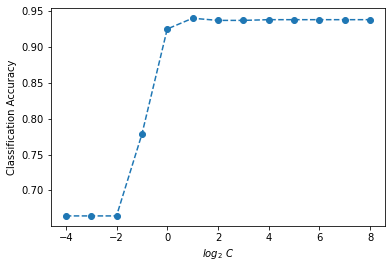

In [8]:
plt.plot(power_values,accuracy,'--o')
plt.xlabel('$log_2 ~ C$')
plt.ylabel('Classification Accuracy')
plt.show()

### Part 2 - Classification using RBF kernel SVM

#### (a) 5-fold cross validation

In [9]:
# Randomly choosing 50% (i.e., 1000 instances) of training data as cross validation set

np.random.seed(69)
instances = np.random.permutation(len(XTrainData))[:1000]
Xtr_instances = dfXTrain.iloc[instances].to_numpy()
Ytr_instances = np.array(YTrainData)[instances.astype(int)]
print(Xtr_instances.shape)
print(Ytr_instances.shape)

(1000, 8)
(1000,)


In [10]:
# Manual implementation of Kfold
C_values = [2**i for i in range(-4,9)]
gamma_values = [2**i for i in range(-4,9)]

import itertools
comb = []
for i in itertools.product(C_values, gamma_values):
  comb.append(i)

In [11]:
accuracy = []
for C, gamma in comb:
    temp = []
    for i in range(0,1000,200):
        XVal = Xtr_instances[i:i+200]
        YVal = Ytr_instances[i:i+200]
        if i == 0:
            XTr = Xtr_instances[i+200:1000]
            YTr = Ytr_instances[i+200:1000]
        else:
            XTr = np.vstack((Xtr_instances[:i],Xtr_instances[i+200:1000]))
            YTr = np.concatenate((Ytr_instances[:i],Ytr_instances[i+200:1000]))
   
        clf = SVC(kernel = 'rbf', C = C, gamma = gamma)
        clf.fit(XTr,YTr)
        temp.append(clf.score(XVal,YVal))
    print('Mean Classification Accuracy for C = {} and gamma = {} is : {}'.format(C, gamma, np.mean(temp)))
    accuracy.append(np.mean(temp))

Mean Classification Accuracy for C = 0.0625 and gamma = 0.0625 is : 0.66
Mean Classification Accuracy for C = 0.0625 and gamma = 0.125 is : 0.66
Mean Classification Accuracy for C = 0.0625 and gamma = 0.25 is : 0.66
Mean Classification Accuracy for C = 0.0625 and gamma = 0.5 is : 0.66
Mean Classification Accuracy for C = 0.0625 and gamma = 1 is : 0.66
Mean Classification Accuracy for C = 0.0625 and gamma = 2 is : 0.66
Mean Classification Accuracy for C = 0.0625 and gamma = 4 is : 0.66
Mean Classification Accuracy for C = 0.0625 and gamma = 8 is : 0.66
Mean Classification Accuracy for C = 0.0625 and gamma = 16 is : 0.66
Mean Classification Accuracy for C = 0.0625 and gamma = 32 is : 0.66
Mean Classification Accuracy for C = 0.0625 and gamma = 64 is : 0.66
Mean Classification Accuracy for C = 0.0625 and gamma = 128 is : 0.66
Mean Classification Accuracy for C = 0.0625 and gamma = 256 is : 0.66
Mean Classification Accuracy for C = 0.125 and gamma = 0.0625 is : 0.66
Mean Classification Acc

Mean Classification Accuracy for C = 32 and gamma = 0.0625 is : 0.95
Mean Classification Accuracy for C = 32 and gamma = 0.125 is : 0.952
Mean Classification Accuracy for C = 32 and gamma = 0.25 is : 0.9509999999999998
Mean Classification Accuracy for C = 32 and gamma = 0.5 is : 0.9469999999999998
Mean Classification Accuracy for C = 32 and gamma = 1 is : 0.95
Mean Classification Accuracy for C = 32 and gamma = 2 is : 0.9390000000000001
Mean Classification Accuracy for C = 32 and gamma = 4 is : 0.933
Mean Classification Accuracy for C = 32 and gamma = 8 is : 0.901
Mean Classification Accuracy for C = 32 and gamma = 16 is : 0.873
Mean Classification Accuracy for C = 32 and gamma = 32 is : 0.8480000000000001
Mean Classification Accuracy for C = 32 and gamma = 64 is : 0.8240000000000001
Mean Classification Accuracy for C = 32 and gamma = 128 is : 0.7809999999999999
Mean Classification Accuracy for C = 32 and gamma = 256 is : 0.738
Mean Classification Accuracy for C = 64 and gamma = 0.0625

In [12]:
accuracyMatrix = np.array(accuracy).reshape(13,13)

In [13]:
print(accuracyMatrix)

[[0.66  0.66  0.66  0.66  0.66  0.66  0.66  0.66  0.66  0.66  0.66  0.66
  0.66 ]
 [0.66  0.66  0.66  0.66  0.66  0.66  0.66  0.66  0.676 0.691 0.68  0.66
  0.66 ]
 [0.66  0.66  0.66  0.66  0.66  0.66  0.675 0.742 0.759 0.748 0.721 0.694
  0.66 ]
 [0.66  0.66  0.66  0.66  0.661 0.75  0.825 0.831 0.82  0.785 0.757 0.725
  0.685]
 [0.66  0.66  0.66  0.675 0.859 0.917 0.914 0.905 0.878 0.841 0.8   0.757
  0.73 ]
 [0.66  0.66  0.704 0.914 0.941 0.931 0.925 0.922 0.9   0.858 0.82  0.777
  0.737]
 [0.66  0.721 0.937 0.949 0.946 0.935 0.93  0.919 0.896 0.848 0.822 0.779
  0.738]
 [0.734 0.941 0.949 0.947 0.947 0.94  0.931 0.918 0.89  0.85  0.826 0.781
  0.738]
 [0.941 0.954 0.953 0.951 0.941 0.94  0.933 0.913 0.877 0.853 0.824 0.781
  0.738]
 [0.95  0.952 0.951 0.947 0.95  0.939 0.933 0.901 0.873 0.848 0.824 0.781
  0.738]
 [0.953 0.951 0.95  0.953 0.949 0.941 0.929 0.901 0.871 0.849 0.824 0.781
  0.738]
 [0.952 0.95  0.954 0.947 0.944 0.939 0.924 0.894 0.863 0.847 0.824 0.781
  0.738]
 [0.95

In [14]:
print(accuracyMatrix.max())

0.954


In [15]:
index = np.unravel_index(np.argmax(accuracyMatrix, axis=None), accuracyMatrix.shape)
print("Maximum accuracy is achieved at matrix location: ", index)

Maximum accuracy is achieved at matrix location:  (8, 1)


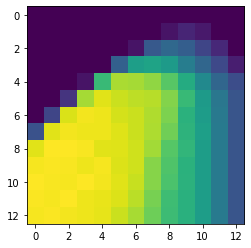

In [16]:
plt.imshow(accuracyMatrix)

#### (b) Train SVM using whole data set and best C and gamma values

In [17]:
# Generate best C and best gamma values obtained from Kfold
bestC = C_values[index[0]]
bestGamma = gamma_values[index[1]]
print("Best parameters according to Kfold are: C = {} and Gamma = {}".format(bestC, bestGamma))

# Train SVM model using best parameters and whole data set
model = SVC(kernel='rbf', C = bestC , gamma = bestGamma)
model.fit(Xtr,Ytr)
accuracy = model.score(Xts,Yts)
print('Classification accuracy using RBF kernel SVM with best parameters is: ',accuracy)

Best parameters according to Kfold are: C = 16 and Gamma = 0.125
Classification accuracy using RBF kernel SVM with best parameters is:  0.9370629370629371
